In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# importer
df =pd.read_csv("..\data\cleaned_data.csv")
df.head()

,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


In [61]:
# removing bedrooms, liv_room_surf, frontages, bathrooms, id, basement,elevator
# surroundings,flood_zone,heating, showers, toilets, furnished, energy_class, heating,flood_zone
df = df.drop(columns = ["kitchen_type", "status_build","bedrooms", "liv_room_surf", "frontages", "bathrooms", "id", "basement","elevator", "surroundings","flood_zone", "heating", "showers","toilets", "furnished", "heating","flood_zone"])

#dropna living_area, price
df = df.dropna(subset=["living_area", "price"])

#replace swimming_pool None with 0
df["swimming_pool"] = df["swimming_pool"].fillna(0)


print(df.isnull().sum())
print(df)

building_type       0
building_subtype    0
price               0
living_area         0
terrace             0
garden              0
swimming_pool       0
energy_class        0
zipcode             0
municipality        0
province            0
dtype: int64
     building_type building_subtype     price  living_area  terrace  garden   
0        apartment        apartment  730000.0        212.0      0.0     0.0  \
1        apartment             loft  775000.0        258.0      0.0     0.0   
2        apartment        apartment   99000.0         94.0      0.0     0.0   
3        apartment        apartment  730000.0        212.0      0.0     0.0   
4        apartment        apartment  219000.0        111.0      0.0   200.0   
...            ...              ...       ...          ...      ...     ...   
9336         house            house  427000.0        180.0     40.0     0.0   
9337         house            house  495000.0        130.0      0.0     0.0   
9338         house            hous

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9172 entries, 0 to 9340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   building_type     9172 non-null   object 
 1   building_subtype  9172 non-null   object 
 2   price             9172 non-null   float64
 3   living_area       9172 non-null   float64
 4   terrace           9172 non-null   float64
 5   garden            9172 non-null   float64
 6   swimming_pool     9172 non-null   float64
 7   energy_class      9172 non-null   float64
 8   zipcode           9172 non-null   int64  
 9   municipality      9172 non-null   object 
 10  province          9172 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 859.9+ KB


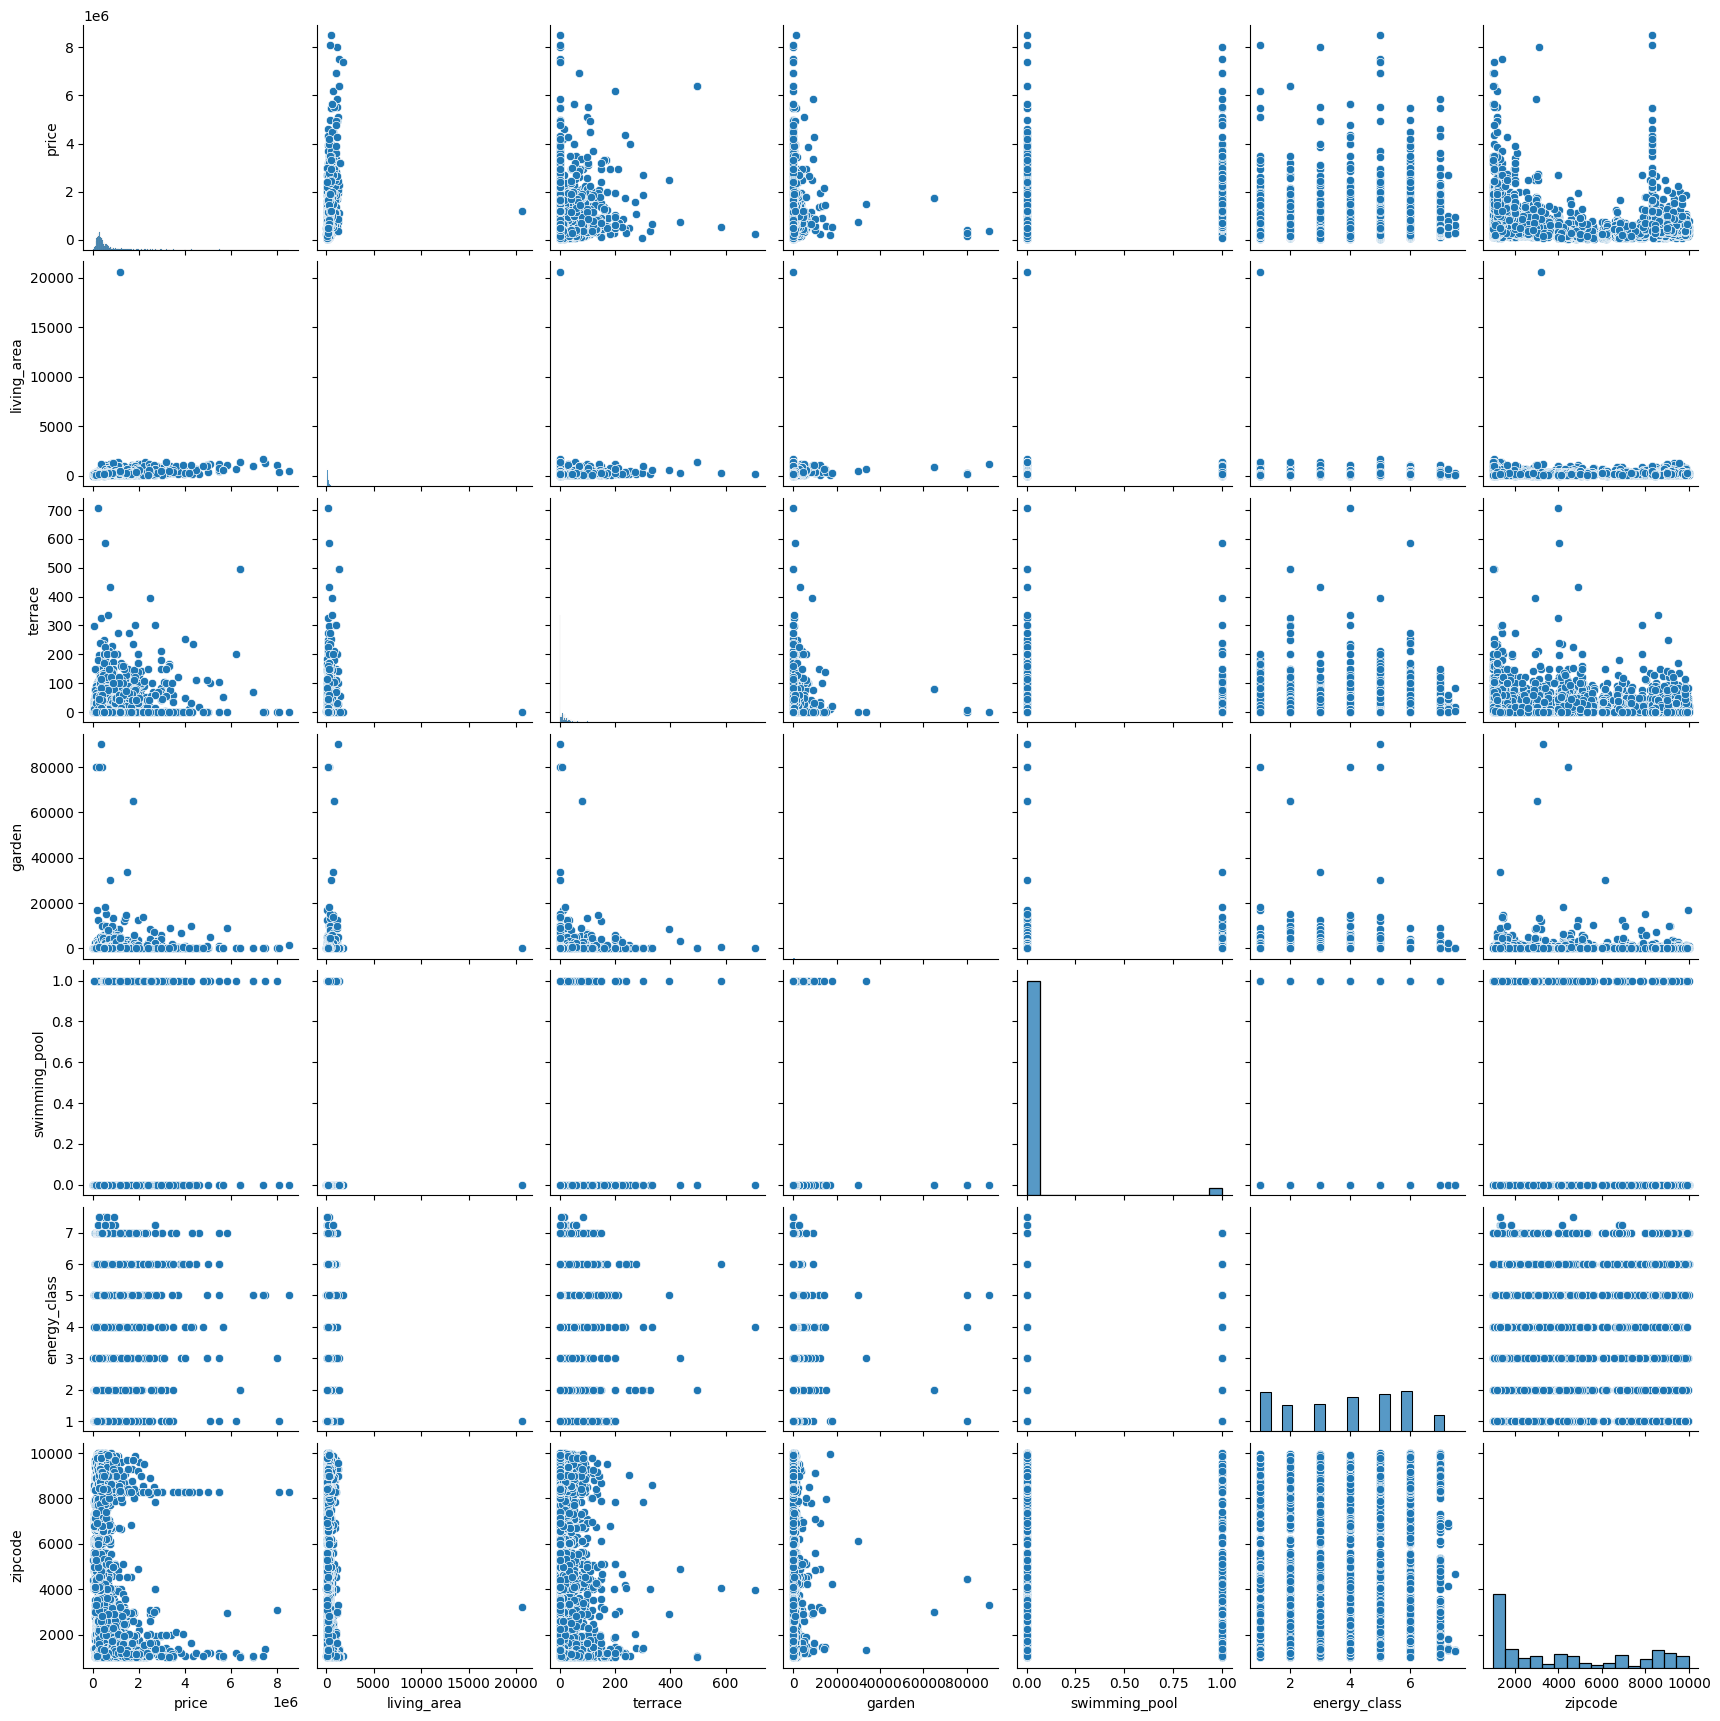

In [87]:
sns.pairplot(df)

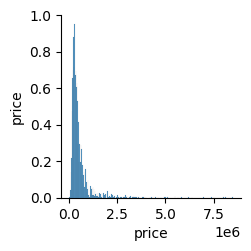

In [78]:
sns.pairplot(df, vars=['price'])

Preparing the data:

In [149]:
X = df[['living_area','energy_class']]
y = df['price']

Train Test Split

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.3)

Build a model

In [151]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Train the Model

In [158]:
regressor.fit(X_train,y_train)


LinearRegression()

Evaluate

In [159]:
print(regressor.intercept_)
print(regressor.coef_)

320750.5423875411
[  599.79785127 20306.98582917]


In [160]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
living_area,599.797851
energy_class,20306.985829


Prediction from our Model

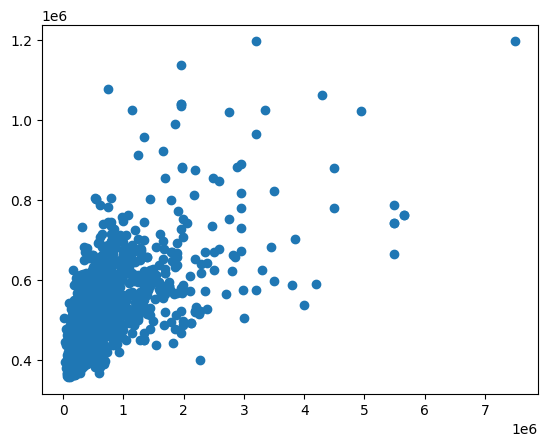

In [161]:
y_predict = regressor.predict(X_test)
plt.scatter(y_test,y_predict)

Regression Evaluation Metrics

In [164]:
from sklearn import metrics

print('R²:', metrics.r2_score(y_test, y_predict))

R²: 0.16677705460962244
